In [46]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rebeccanoeliawalker/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rebeccanoeliawalker/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rebeccanoeliawalker/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages+1):
    
    print(f"Scraping page {i}")
    
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    
    response = requests.get(url)
    
    content = response.content
    
    parsed_content = BeautifulSoup(content, 'html.parser')
    
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
        
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [11]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Never I saw such a terribl...
1,✅ Trip Verified | Having not flown with BA fo...
2,✅ Trip Verified | Dear Community I feel compel...
3,✅ Trip Verified | Quick bag drop at First Win...
4,✅ Trip Verified | 4 Hours before takeoff we r...


In [6]:
df.to_csv("BA_reviews.csv")

In [7]:
data = pd.read_csv("BA_reviews.csv")

In [13]:
data.describe()

,Unnamed: 0
count,1000.000000
mean,499.500000
std,288.819436
min,0.000000
25%,249.750000
50%,499.500000
75%,749.250000
max,999.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [49]:


def clean_text(text):
    
#     make everything lower case
    text = text.lower()
    
    text = text.replace("✅ trip verified", "").replace("❌ trip not verified", "")
    
#     remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    
#     tokenisation
    words = word_tokenize(text)
    
#     remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
#     rejoin words 
    cleaned_text = ' '.join(words)
    
    return words

In [51]:
data['cleaned_review'] = data['reviews'].apply(clean_text)

In [52]:
print(data.head(10))

   Unnamed: 0                                            reviews  \
0           0  ✅ Trip Verified |   Never I saw such a terribl...   
1           1  ✅ Trip Verified |  Having not flown with BA fo...   
2           2  ✅ Trip Verified | Dear Community I feel compel...   
3           3  ✅ Trip Verified |  Quick bag drop at First Win...   
4           4  ✅ Trip Verified |  4 Hours before takeoff we r...   
5           5  ✅ Trip Verified |  I recently had a delay on B...   
6           6  Not Verified |  Boarded on time, but it took a...   
7           7  ✅ Trip Verified |  5 days before the flight, w...   
8           8  Not Verified |  \r\nWe traveled to Lisbon for ...   
9           9  ✅ Trip Verified |  Booked a flight from Buchar...   

                                      cleaned_review  sentiment  
0  [never, saw, terrible, customer, experience, p...  -0.437500  
1  [flown, ba, year, read, review, preparation, n...  -0.065556  
2  [dear, community, feel, compelled, share, utte... 

In [39]:
!pip install textblob
!pip install wordcloud matplotlib
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.8/222.8 kB 4.9 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.9.2-cp311-cp311-macosx_11_0_arm64.whl size=151332 sha256=096fa48186cf38d37900c704361742843ca52b0deb13bdc66eb3270d76c3e375
  Stored in directory: /Users/rebeccanoeliawalker/Library/Caches/pip/wheels/3f/c6/5a/89824e1846baaa6d6d54b3a7b1e7deecc9ae6e7ed30a1c8b0e
Successfully built wordcloud


Average Sentiment: 0.0734553647726581


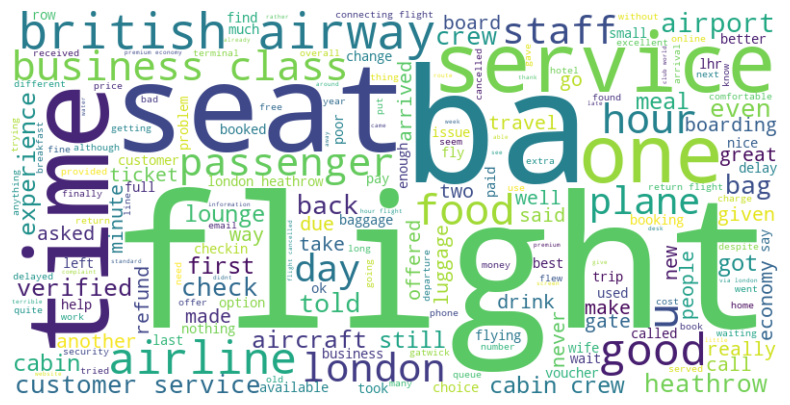

In [42]:
# Example: Calculate sentiment polarity using TextBlob
data['sentiment'] = data['cleaned_review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Example: Generate a word cloud
all_reviews_text = ' '.join(data['cleaned_review'])
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(all_reviews_text)

# Display the sentiment and word cloud
print("Average Sentiment:", data['sentiment'].mean())
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [53]:
# Create a dictionary representation of the reviews
dictionary = corpora.Dictionary(data['cleaned_review'])

# Create a bag-of-words representation of the reviews
corpus = [dictionary.doc2bow(review) for review in data['cleaned_review']]

# Train the LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Display the topics
for idx, topic in lda_model.print_topics():
    print(f"Topic #{idx}:\n{topic}\n")

# Assign topics to the reviews
data['topic'] = [max(lda_model[corpus[i]], key=lambda x: x[1])[0] for i in range(len(corpus))]

# Display the DataFrame with assigned topics
print(data[['reviews', 'topic']].head())

Topic #0:
0.023*"flight" + 0.013*"ba" + 0.009*"crew" + 0.008*"time" + 0.007*"one" + 0.007*"cabin" + 0.007*"’" + 0.007*"seat" + 0.007*"boarding" + 0.007*"service"

Topic #1:
0.022*"flight" + 0.019*"seat" + 0.015*"ba" + 0.013*"service" + 0.012*"food" + 0.012*"good" + 0.010*"class" + 0.008*"crew" + 0.008*"business" + 0.008*"cabin"

Topic #2:
0.017*"seat" + 0.011*"flight" + 0.010*"ba" + 0.008*"club" + 0.008*"service" + 0.008*"crew" + 0.007*"cabin" + 0.006*"class" + 0.006*"meal" + 0.005*"good"

Topic #3:
0.037*"flight" + 0.013*"hour" + 0.012*"ba" + 0.010*"london" + 0.010*"u" + 0.009*"time" + 0.008*"airway" + 0.008*"british" + 0.008*"’" + 0.008*"airline"

Topic #4:
0.022*"flight" + 0.019*"ba" + 0.011*"customer" + 0.010*"’" + 0.009*"service" + 0.008*"would" + 0.008*"refund" + 0.007*"call" + 0.007*"day" + 0.007*"ticket"

                                             reviews  topic
0  ✅ Trip Verified |   Never I saw such a terribl...      3
1  ✅ Trip Verified |  Having not flown with BA fo...   

In [44]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 3.2 MB/s eta 0:00:00
  Obtaining dependency information for simpful from https://files.pythonhosted.org/packages/8d/93/8448d3f1aa9d2911b8cba2602aaa1af85eb31a26d28b7b737f1fa5b40c02/simpful-2.11.1-py3-none-any.whl.metadata
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20430 sha256=6d55b63a10c89d1002ffc9032cc540716cddba9411ed2d111ef4cb641efe68f2
  Stored in directory: /Users/rebeccanoeliawalker/Library/Caches/pip/wheels/69/f5/e5/18ad53fe1ed6b2af9fad05ec052e4acbac8e92441df44bad2e
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3513 sha256=a6e32b236e1435bb2d48b64787ede6806e86cb8787e42ed8511c44ab47b08788
  Stored in directory: /Users/rebeccanoeliawalker/Library/Caches/pip/wheels/9d/ff/2f/afe4cd56f47de147407705626517d68bea0f3b74eb1fb168e6
Successfully built fst-pso miniful


In [54]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 6.1 MB/s eta 0:00:0000:0100:01


In [55]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [56]:
# Train the LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Visualize the topics
pyLDAvis.enable_notebook()
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis_data)

In [57]:
pyLDAvis.save_html(vis_data, 'lda_visualization.html')